In [49]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image 
import numpy
import imageio
import cv2
import skimage.color as color 
import skimage.feature as feature
import skimage.transform as transform
import skimage

### 1.Reading & 2.Displaying

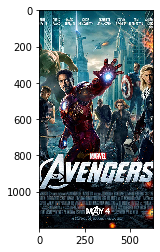

In [50]:
image=Image.open("avengers_imdb.jpg")
image.show()
plt.imshow(image)

### Image Size 

In [51]:
print(image.size)
print(image.format)
print(image.mode)

(630, 1200)
JPEG
RGB


### Black and White

In [52]:
pwd


'/Users/anmolguggari/Desktop/data_mining/CW2/data/SOLUTIONS_IMAGE_DATA'

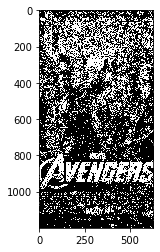

In [53]:
image_file =Image.open("avengers_imdb.jpg")
image_file = image_file.convert('1') # convert image to black and white
plt.imshow(image_file)
plt.savefig( 'output/blackandwhite.jpg' )

### GrayScale

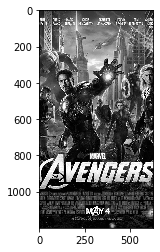

In [54]:
img = Image.open("avengers_imdb.jpg")
img = img.convert('LA') # convert image to grayscale
plt.imshow(img)
plt.savefig( 'output/graysclae.jpg' )

### 2 Gaussian

In [55]:
from scipy import ndimage, misc
import matplotlib.pyplot as plt
#PIL.Image.open("bush_house_wikipedia.jpg").convert('RGB')
fig=Image.open("bush_house_wikipedia.jpg")
# fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
# ax1 = fig.add_subplot(121)  # left side
# ax2 = fig.add_subplot(122)  # right side
ascent = misc.ascent()
result = ndimage.uniform_filter(ascent, size=20)
# ax1.imshow(ascent)
# ax2.imshow(result)
plt.show()

<Figure size 432x288 with 0 Axes>

In [56]:
#gaussian

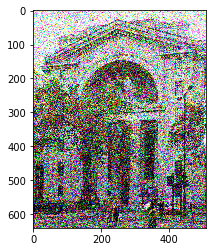

In [57]:
image2=Image.open("bush_house_wikipedia.jpg")
image2_array = np.asarray(image2)
image_gn = skimage.util.random_noise(image2_array, mode='gaussian', seed=0, var=0.1)
plt.imshow(image_gn)
plt.savefig( 'output/gussian.jpg' )


In [58]:
#uniform filter with size=(9, 9, 1)

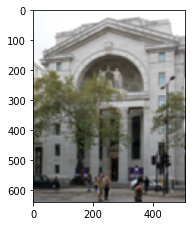

In [59]:
from scipy import ndimage, misc
import matplotlib.pyplot as plt
img_house=Image.open("bush_house_wikipedia.jpg")

fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
result = ndimage.uniform_filter(img_house, size=(9, 9, 1))
ax1.imshow(result)
plt.savefig( 'output/uniformfiltter.jpg' )
plt.show()

### Part 3 - 5 segements clustering 

In [60]:
from matplotlib.image import imread
import matplotlib.pyplot as plt 

In [61]:
image = cv2.imread("forestry_commission_gov_uk.jpg")

In [62]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [63]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
print(pixel_values.shape)

(256680, 3)


In [64]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

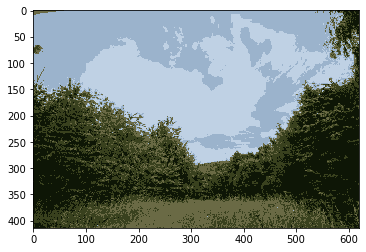

In [65]:
# apply cluster of 5 
k = 5
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
labels = labels.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)
plt.imshow(segmented_image)
plt.savefig( 'output/k_clustering.jpg' )
plt.show()

### 4. Canny edge detection and apply Hough transform 

### Subplots

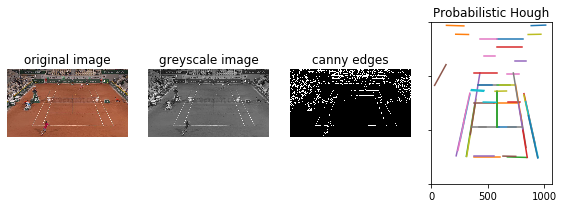

In [66]:
#--
# p5.py
# apply straight line Hough transform to image
# @author: letsios, sklar
# @created: 28 Jan 2021
#--

import numpy as np
import imageio
import matplotlib.pyplot as plt
import skimage.color as color 
import skimage.feature as feature
import skimage.transform as transform

#-read image from a file into an image object named 'im'
im = imageio.imread( 'rolland_garros_tv5monde.jpg' )

#-convert the image to greyscale
img = color.rgb2gray( im )

#-perform Canny edge detection
edges = feature.canny( img )

#-apply classic straight-line Hough transform
lines = transform.probabilistic_hough_line( edges, threshold=10, line_length=100, line_gap=3 )

#-plot the results
fig, (ax0, ax1, ax2, ax3) = plt.subplots( nrows=1, ncols=4, figsize=(8, 3), sharex=True, sharey=True )

ax0.imshow( im )
ax0.axis( 'off' )
ax0.set_title( 'original image' )

ax1.imshow( img, cmap=plt.cm.gray, interpolation='nearest' )
ax1.axis( 'off' )
ax1.set_title( 'greyscale image' )

ax2.imshow( edges, cmap=plt.cm.gray, interpolation='nearest' )
ax2.axis( 'off' )
ax2.set_title( 'canny edges' )

for line in lines:
    p0, p1 = line
    ax3.plot(( p0[0], p1[0] ), ( p0[1], p1[1] ))
ax3.set_xlim(( 0, img.shape[1] ))
ax3.set_ylim(( img.shape[0], 0 ))
ax3.set_title( 'Probabilistic Hough' )

fig.tight_layout()

plt.savefig( 'output/prohough.jpg' )
plt.show()
